<a href="https://colab.research.google.com/github/angela695/GFG_21Days_21Projects/blob/main/Titanic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# styling the charts :
sns.set(style = 'whitegrid')

In [6]:
# # cloning github to have access to all the datasets :
# !git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

In [7]:
# loading the titanic dataset :
df = pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')

working with the dataset and learning about it more :

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

info about the data :
- dataset contains 12 columns and 891 rows
- the columns : age has 177 rows missing , cabin has a huge amount of missing values (687), and embarked has 2 values missing

In [10]:
# getting a statistical analysis :
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

interpretation :    
- survived : 38% passengers survived
- age : mn age was 4 months and max was 80 years old
- fare : min 0 and max as 512 but the mean (32.20) is very much close to 0 than to 512 . this means its a right skewed dataset so there will be outliers .


In [11]:
df.Cabin.value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

### Data Cleaning

- First handle the missing values

for:
**numerical** : fill with mean or median
**categorical** : fill with mode
**high cardinality or too many missing values**  : either drop the whole column or create a new column (new feature) from it

- filling the missing age values with the median values

In [12]:
df_copy = df.copy()
median = df.Age.median()
df_copy.fillna({'Age' : median} , inplace = True)

- working on embarked column

In [13]:
mode = df.Embarked.mode()[0]
df_copy['Embarked']=df_copy['Embarked'].fillna(mode )

- working on cabin


will convert the cabin into integer series where the nan values will be 0 and non nan will be 1

In [14]:
df_copy["new_Cabin"]=df_copy["Cabin"].notna().astype(int)
df_copy.drop('Cabin' , axis = 1 , inplace = True)

In [15]:
df_copy['new_Cabin'].value_counts()

new_Cabin
0    687
1    204
Name: count, dtype: int64

# Data Cleaning Done

# univariate analysis :

- analysing one variable to understand the distribution

*   for categorical columns : use pie charts , bar charts , or frquency tables
*   numerical columns : histograms , kernel density plots and boxplots





In [16]:

df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'new_Cabin'],
      dtype='object')

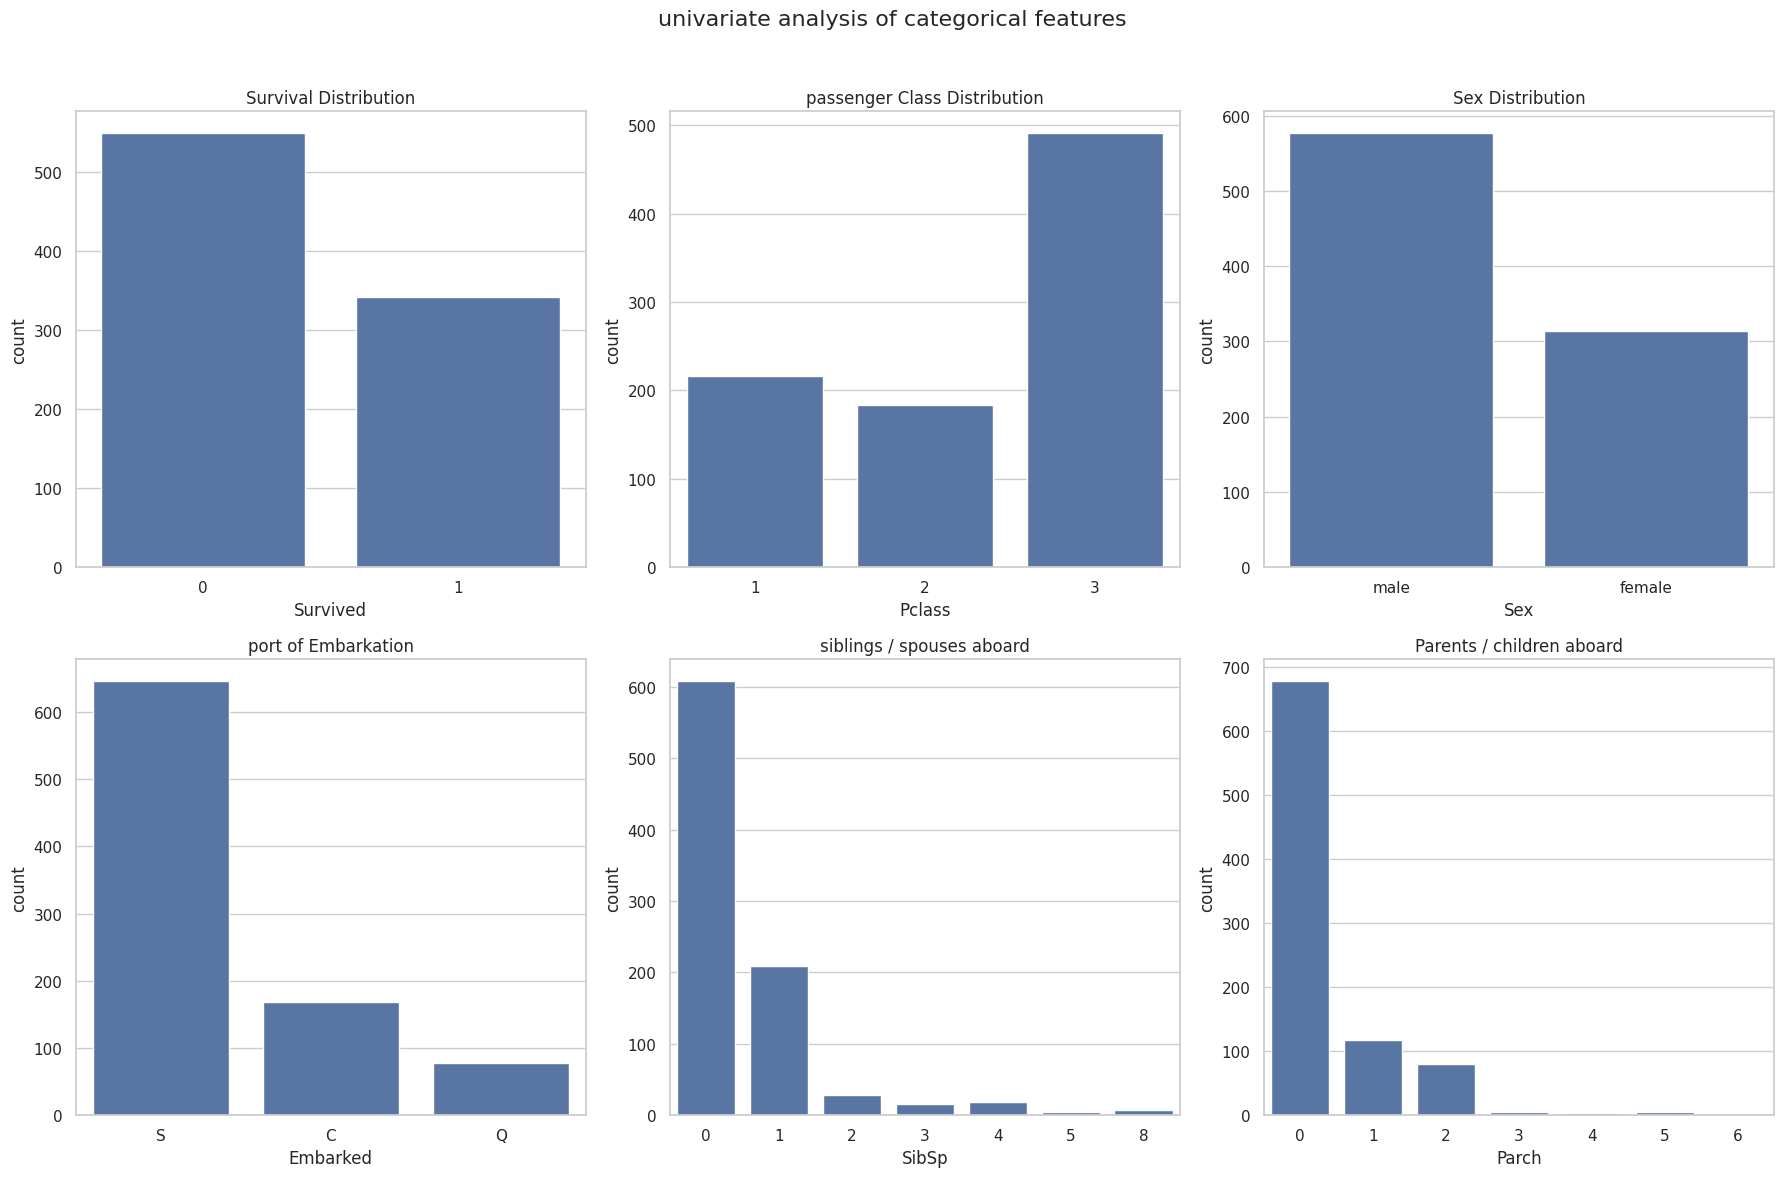

In [17]:
# setting up figure size :
fig , axes = plt.subplots(nrows = 2 , ncols = 3 , figsize = (18,12))
fig.suptitle('univariate analysis of categorical features' , fontsize = 16)

# plotting for each categorical column :
sns.countplot(ax = axes[0,0] , x = 'Survived' , data = df_copy ).set_title('Survival Distribution')
sns.countplot(ax = axes[0,1] , x = 'Pclass' , data = df_copy ).set_title('passenger Class Distribution')
sns.countplot(ax = axes[0,2] , x = 'Sex' , data = df_copy ).set_title('Sex Distribution')
sns.countplot(ax = axes[1,0] , x = 'Embarked' , data = df_copy ).set_title('port of Embarkation')
sns.countplot(ax = axes[1,1] , x = 'SibSp' , data = df_copy ).set_title('siblings / spouses aboard')
sns.countplot(ax = axes[1,2] , x = 'Parch' , data = df_copy ).set_title('Parents / children aboard')

plt.tight_layout(rect = [0 , 0 , 1 , 0.96])
plt.show()



interpretation :     


1.   surivial : most people died :(
2.   Pclass : majority people were in class 3 , which means those people were most likely poor :)
3. Sex : patriarchy won again
4. Embarked : looks like southampton's the only shark in the port market
5. Siblings and Spouses : ek biwi husband ko milega kiwi. ek bacha sab ke liye acha. (idk what i just said but i liked it :) )
6. Parents and children : saasu maa wali cheezo se dur rehna achi baat hoti hai :)



In [18]:
df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'new_Cabin'],
      dtype='object')

analyzing numerical features : 


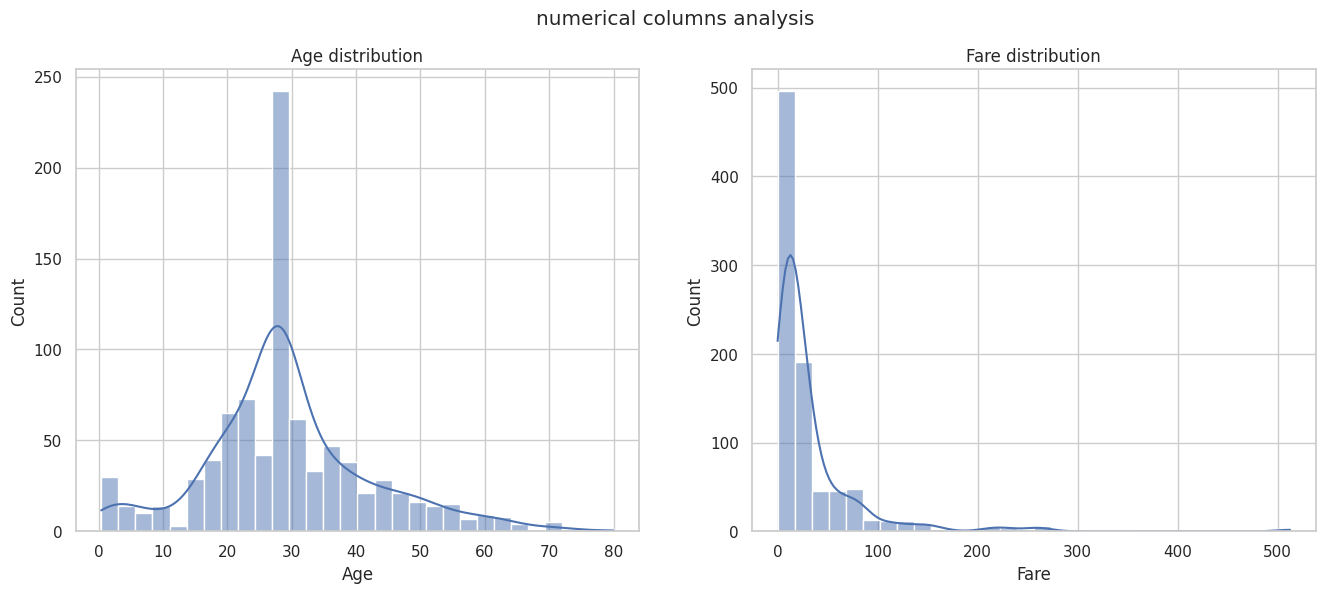

In [19]:
print('analyzing numerical features : ')

# plotting for each numerical column :
fig , axes = plt.subplots(nrows = 1 , ncols = 2 , figsize = (16,6))
fig.suptitle('numerical columns analysis')

sns.histplot(ax = axes[0] , x = 'Age' , data = df_copy , kde = True , bins = 30 ).set_title('Age distribution')
sns.histplot(ax = axes[1] , x = 'Fare' , data = df_copy , kde = True , bins = 30 ).set_title('Fare distribution')

plt.show()

interpretation :    

*   Age : jawan logo ki jawani
*   Fare : gareeb logo ki gareebi
(idk what i said again but i like it :) )

btw both the graphs are heavily right skewed




### gotta do the bivariate analysis :

relation between two variables

*   **categorical vs. numerical** : use barplots (most used) , boxplots, or violin plots .
*   **categorical vs categorical** : use stacked bar charts or contigency charts .
*   **numerical vs numerical** : scatter plot (standard choice) with a correlation matrix to quantify the relation .


In [20]:
df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'new_Cabin'],
      dtype='object')

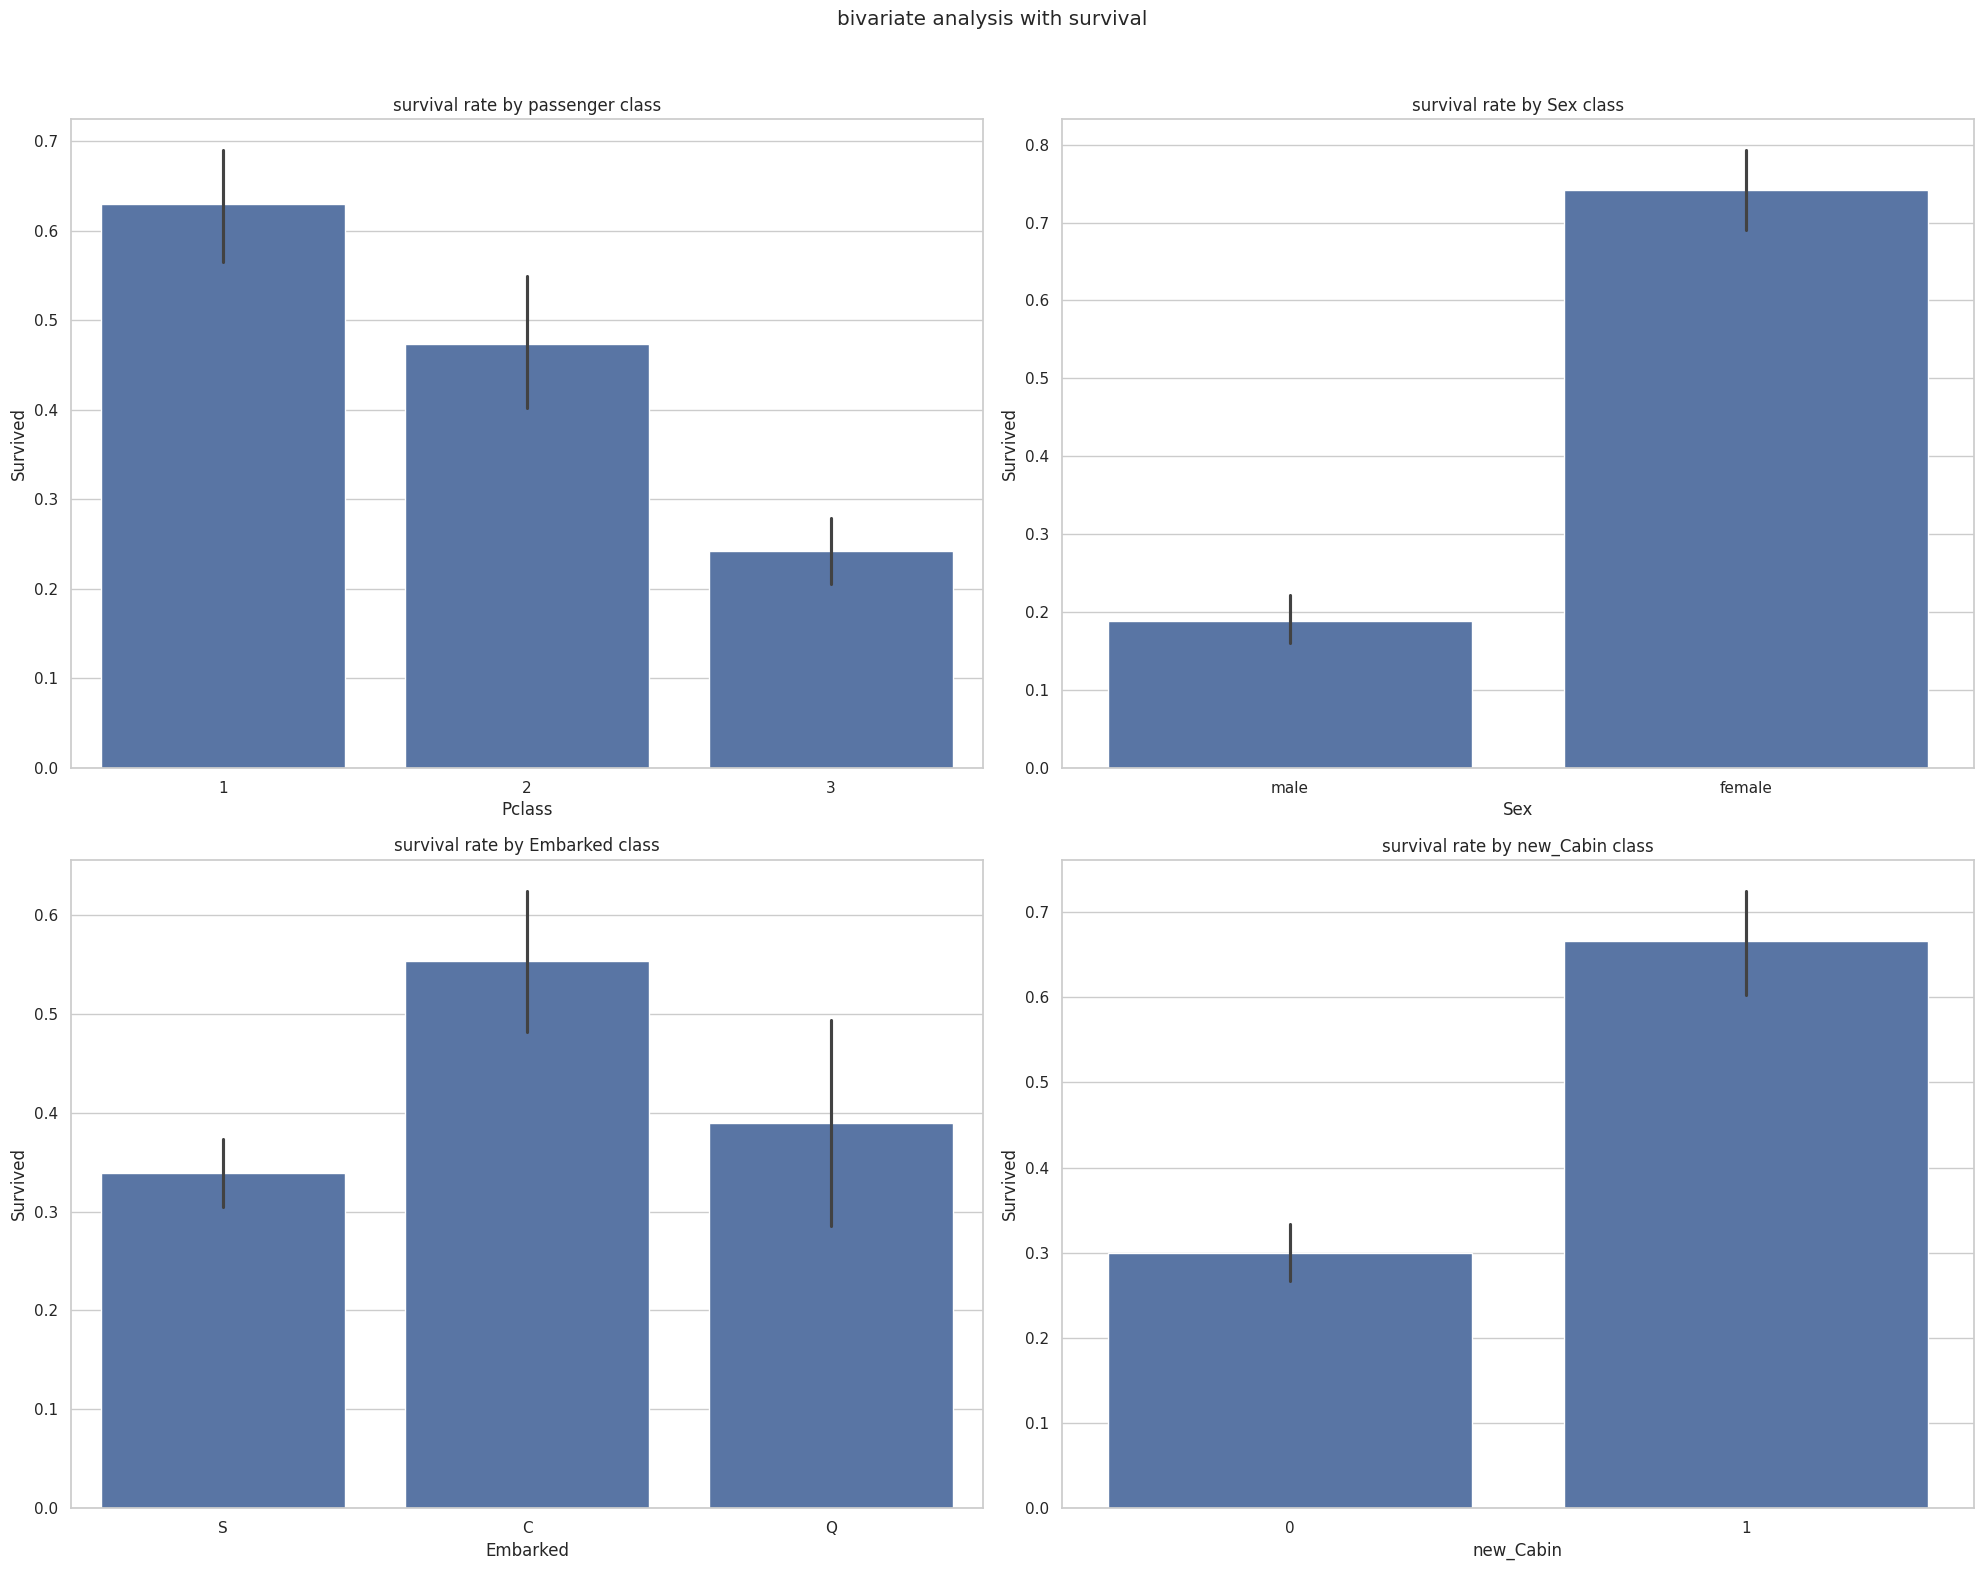

In [21]:
fig , axes = plt.subplots(nrows = 2 , ncols = 2 , figsize = (20,16))
fig.suptitle('bivariate analysis with survival')

# Pclass vs survived :
sns.barplot(ax = axes[0,0] , x = 'Pclass' , y = 'Survived' , data = df_copy).set_title('survival rate by passenger class')
# Sex vs survived :
sns.barplot(ax = axes[0,1] , x = 'Sex' , y = 'Survived' , data = df_copy).set_title('survival rate by Sex class')
# Embarked vs survived :
sns.barplot(ax = axes[1,0] , x = 'Embarked' , y = 'Survived' , data = df_copy).set_title('survival rate by Embarked class')
# new_Cabin vs survived :
sns.barplot(ax = axes[1,1] , x = 'new_Cabin' , y = 'Survived' , data = df_copy).set_title('survival rate by new_Cabin class')

plt.tight_layout(rect = [0,0,1,0.96])
plt.show()



Interpretation :
---
*   class : first class survived more than the poor people[> 60%] ( money wins all the time )
*   Sex : ladies first [>70%](poor men)
*   port : C had more people survived [>50%]. good market and traffic doesn't always guarantee your longevity after all.
*   Cabin : the ones who paid for a cabin survived more than the ones who didnt pay for the cabin [>60%].

(the line above the boxes are confidence intervals , LONGER LINE : MORE UNCERTAINTY , SHORTER LINE : LESSER UNCERTAINTY)



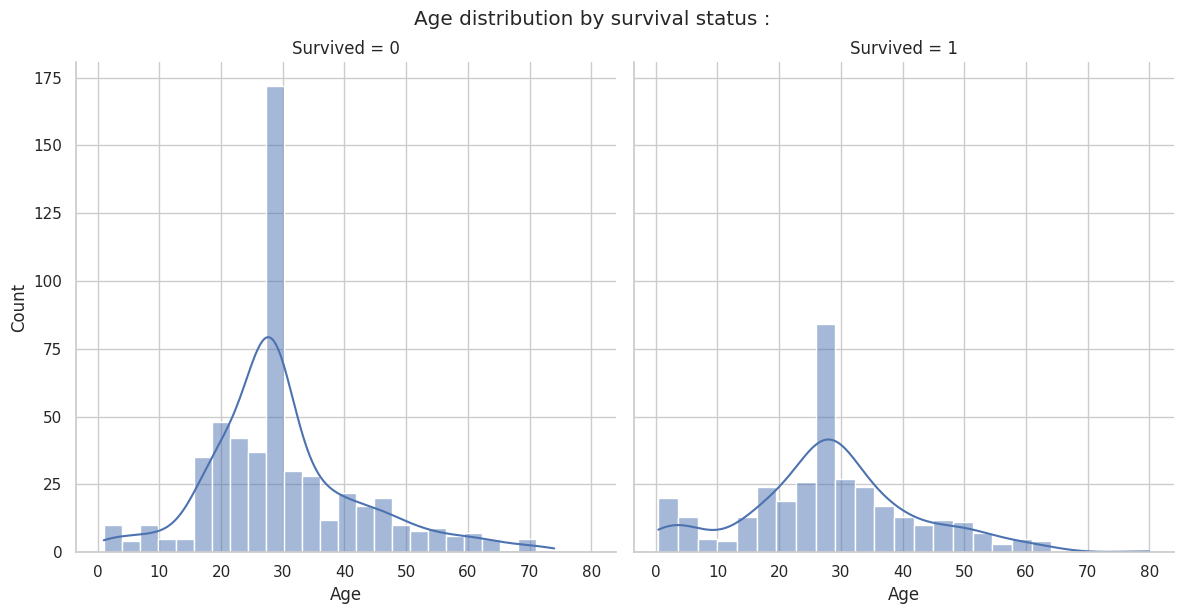

In [22]:
# to create a multi-plot grid (small multiples) that visualizes the distribution
# of variables or relationships within subsets of a dataset
g = sns.FacetGrid(df_copy , col = 'Survived' , height = 6)
g.map(sns.histplot, 'Age' , bins = 25 , kde = True )
plt.suptitle('Age distribution by survival status :' , y = 1.02)
plt.show()

interpretation :


---


*   younger people have more energy to run away faster
*   large portion of survival were of young adults (20 - 40)



### outlier analysis for fare
*   the .describe() function shows that the Fare has extreme outliers .
*   boxplots helps in visualizing that data for outliers





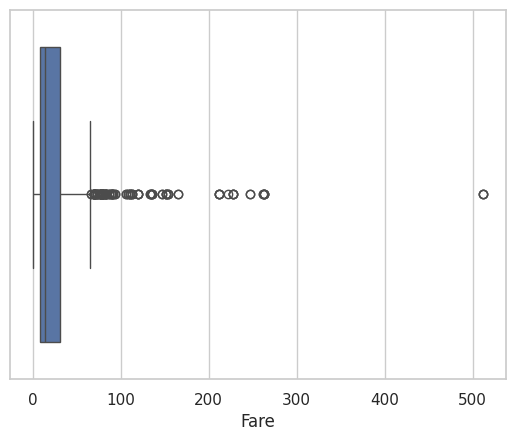

In [23]:
sns.boxplot(x= 'Fare' , data = df_copy)
plt.show()

interpretation :     


---



*   contains significant outliers
*   most of the outliers are concentrated below 100 , but there are several fares extending far beyond 100.
*   one is also near 500
*   these outliers indicate that there were some first class passengers who paid quite a lot for the trip.




#### Feature engineering :     


*   Creating new features from the existing ones
*   this helps in uncovering deeper insights and useful for providing information for an ML model .

Common Techniques :
1. combining features .
2. extracting from text.
3. Binning.



In [24]:
df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'new_Cabin'],
      dtype='object')

In [25]:
# creating a column for family size :
df_copy['FamilySize'] = df_copy['SibSp'] + df_copy['Parch'] + 1

In [26]:
# column for a single person :
df_copy['isAlone'] = 0 #isALone is a column filled with 0s initially.
# wherever the familysize is 1 isAlone will be 1 and not 0
df_copy.loc[df_copy.FamilySize == 1 , 'isAlone'] = 1

df_copy[['FamilySize' , 'isAlone']].head(3)

FamilySize  isAlone
0           2        0
1           2        0
2           1        1

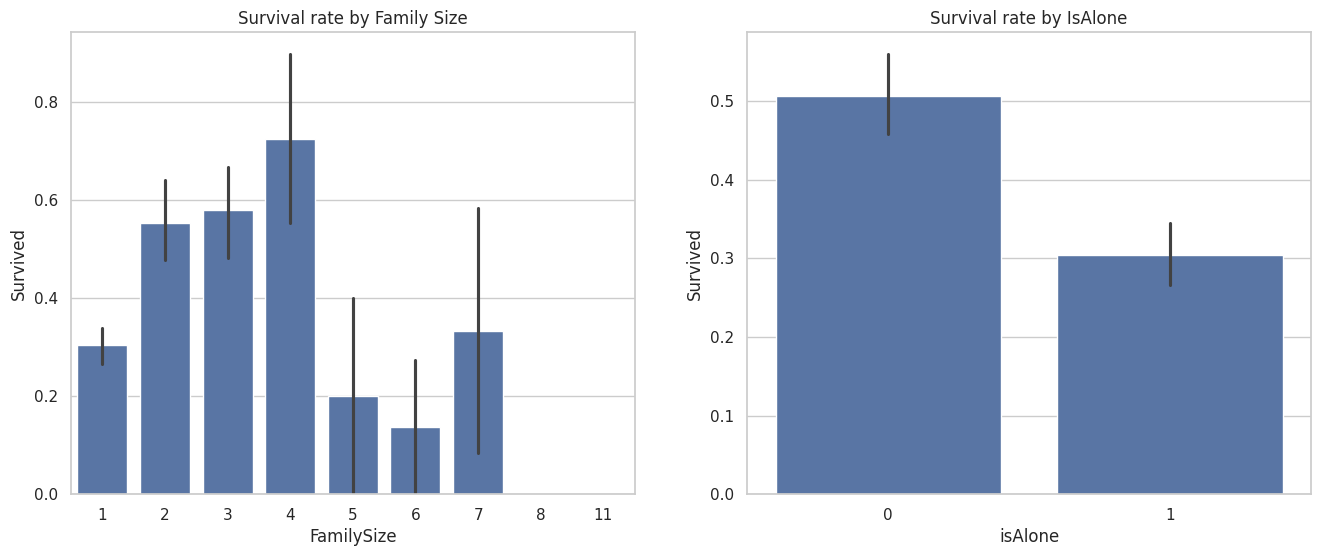

In [27]:
# analysing the familysize with survival :

fig , axes = plt.subplots(nrows = 1 , ncols = 2 , figsize=(16, 6) )

# survival rate by familysize :
sns.barplot(ax =axes[0] , x = 'FamilySize' , y = 'Survived' , data = df_copy).set_title('Survival rate by Family Size')

# survival rate by isAlone :
sns.barplot(ax =axes[1] , x = 'isAlone' , y = 'Survived' , data = df_copy).set_title('Survival rate by IsAlone')

plt.show()

Interpretation :  
*   small families survived better than families with more children .
*  single people had lesser survival rate .



In [28]:
# extract the title from the name column :
df_copy['Title'] = df_copy.Name.str.extract(r' ([A-Za-z]+)\.', expand = False)

# look for extract on google for better understanding

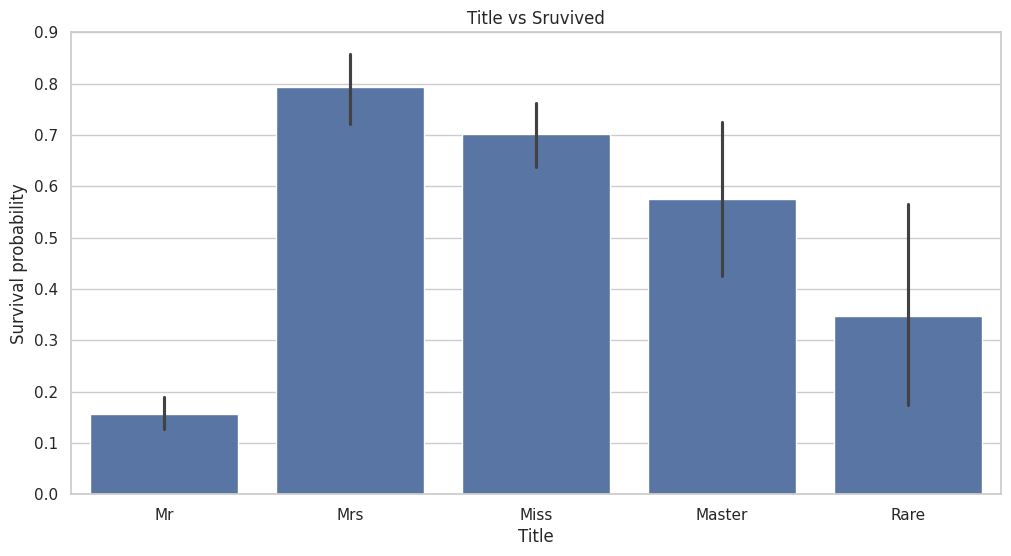

In [29]:
# we shall categorise all the titles like lady , sir, Major etc...
# as 'rare' because their count is really small :
df_copy.Title = df_copy.Title.replace(['Dr','Rev','Col','Major', 'Don' ,'Lady',
'Sir', 'Capt' , 'Countess','Jonkheer'	] , 'Rare')

df_copy.Title = df_copy.Title.replace(['Mlle' , 'Ms' ], 'Miss')
df_copy.Title = df_copy.Title.replace('Mme', 'Mrs')

# survival rate by the new titles :
plt.figure(figsize = (12, 6 ))
sns.barplot(x = 'Title' , y = 'Survived' , data= df_copy).set_title('Title vs Sruvived')
plt.ylabel('Survival probability')

plt.show()

Interpretation :    


*   Females (married and unmarried) and children were more likely to survived
*   Rare is associated wth nobility also survived than Mr
*   Master (young boys) were the third msot likely to survive.





<Figure size 1200x600 with 0 Axes>

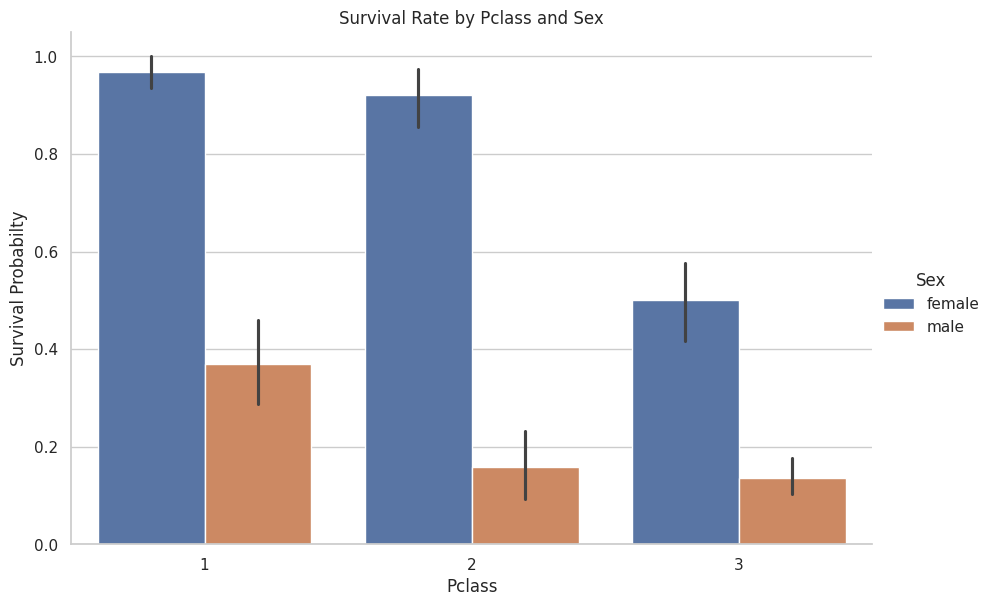

In [30]:
# survival rates vs gender :
plt.figure(figsize = (12, 6 ))
sns.catplot(x = 'Pclass' , y = 'Survived' , hue = 'Sex' , data = df_copy , kind = 'bar' , height = 6 , aspect = 1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probabilty')
plt.show()

Interpretation :    
*   females of all classes had a better chance of surviving
*   females of the third class had lesser chances of surviving than noble females .



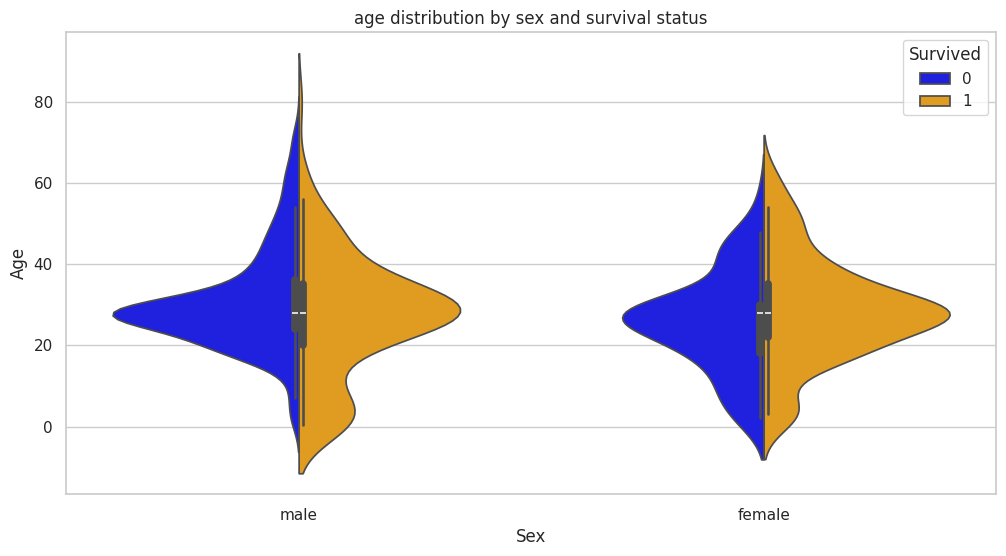

In [31]:
# violin plot to see age distribution by sex and survival status :
plt.figure(figsize = (12, 6 ))
sns.violinplot(x= 'Sex' , y = 'Age' , hue = 'Survived' , data = df_copy , split = True , palette = { 0 : 'blue' , 1 : 'orange'}).set_title('age distribution by sex and survival status')
plt.show()

interpretation :    
*   males : Survival peak at ( 20 -30 ) but non-survived peaked more so more of those didnt survive.
*   females : more females survived .



In [32]:
df_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'new_Cabin', 'FamilySize',
       'isAlone', 'Title'],
      dtype='object')

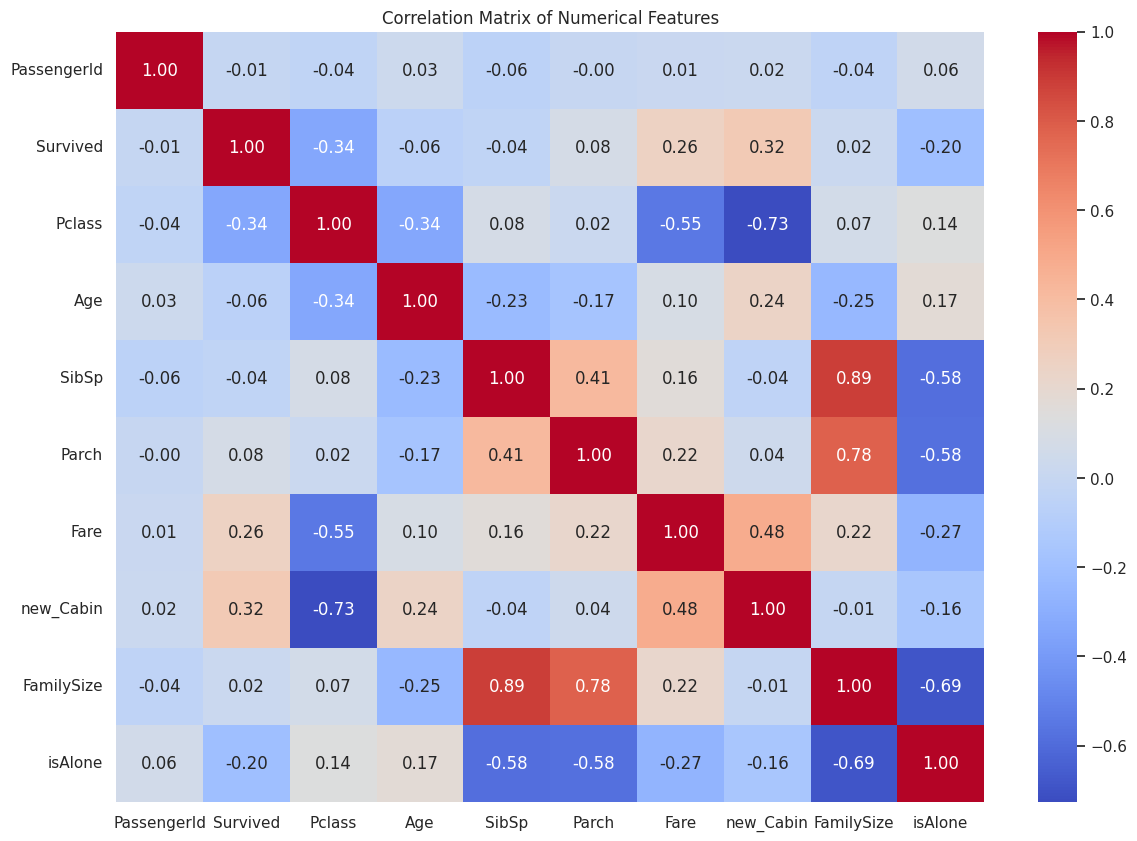

In [33]:
# correlation heatmap for numerical features :
plt.figure(figsize=(14 , 10))
numeric_cols = df_copy.select_dtypes(include = np.number)
corr_mat = numeric_cols.corr()
sns.heatmap(corr_mat , annot = True , cmap = 'coolwarm' , fmt = '.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Interpretation :    
*   survived had a +ve correlation with fare and new_cabin , -ve with Pclass and isAlone features .
*   Pclass and Fare are strongly -vely correlated (higher fare = higher class [1st class])
*   FamilySize cpntains Parch and SibSp so its highly correlated by definition






### Final Conclusion and Summary of Insights :    

In [34]:
!pip install ydata_profiling
import ydata_profiling as pp

In [37]:
pp.ProfileReport(df_copy)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 15/15 [00:00<00:00, 42.44it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]